In [1]:
import vaex
from glob import glob
from os.path import join, abspath
from os import pardir
import numpy as np
from matplotlib import pyplot as plt
import sys

In [6]:
current = abspath('')
root_dir = abspath(join(current, pardir))

if not root_dir in sys.path:
    sys.path.append(root_dir)

from utils import safe_mkdir

In [4]:
# root dir
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

## Create new directories for filtered GAIA and 2MASS data

In [6]:
name = "GAIA"
data_dir = join(root_data_dir, name)
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/GAIA already exist. Good to go!


In [44]:
name = "TMASS"
data_tmass_dir = join(root_data_dir, name)
safe_mkdir(data_tmass_dir)

Directory /home2/s20321005/Thesis-Project/Data/TMASS already exist. Good to go!


## Load the OG

In [7]:
# load Gaia-2MASS
name = "Gaia-2MASS"
gaia_dir = join(root_data_dir, name)
gaia_files = glob(join(gaia_dir, "*.hdf5"))
gaia_files.sort()
gaia_files[:5], len(gaia_files)

(['/home2/s20321005/Thesis-Project/Data/Gaia-2MASS/gaia-000-001.hdf5',
  '/home2/s20321005/Thesis-Project/Data/Gaia-2MASS/gaia-001-002.hdf5',
  '/home2/s20321005/Thesis-Project/Data/Gaia-2MASS/gaia-002-003.hdf5',
  '/home2/s20321005/Thesis-Project/Data/Gaia-2MASS/gaia-003-004.hdf5',
  '/home2/s20321005/Thesis-Project/Data/Gaia-2MASS/gaia-004-005.hdf5'],
 360)

In [7]:
# read Gaia-2MASS into vaex
gaia_raw = vaex.open_many(gaia_files)
gaia_raw

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs
0,0.035724,-89.033127,15.052,14.149,UCU,999999,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--
1,0.063679,-89.064964,16.05,14.818,ABB,4611985154309689728,22.728117,18.444002843809276,0.2338192,13.281042088032434,0.17243546,1.9008664677626548,0.14516754,18.659096,19.952793,17.509138,14.816096,92.14082,0.961987,1.434219,nan,nan,303.16646276195394,-28.03992520733377,3567.7712,3540.4517,3591.2698,4.8081,4.7134,4.8715,-0.5701,-0.7321,-0.4132,511.7533,482.8406,543.6623,0.5659,0.532,0.5969,nan,nan,nan,nan,nan,nan,nan,nan,nan,
2,0.065677,-89.440903,16.832,15.721,CCD,4611773979359229696,12.257193,10.270257194694619,0.5276517,-6.690335307418338,0.73907304,1.6194768785625475,0.46543595,20.19899,21.46941,18.940907,5.781402,32.732517,1.0632449,1.5661117,nan,nan,303.07168987844585,-27.673373331486737,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,
3,0.067073,-89.130386,15.453,14.788,AAB,4611972995259913856,6.025634,6.025590956511702,0.08982857,-0.022785710268113032,0.08030422,0.4389235852794528,0.065967396,17.134779,17.24778,16.258772,32.04953,42.694496,1.1276225,1.5967586,nan,nan,303.15001941439283,-27.976158120916963,5370.4893,5230.6763,5469.612,4.6165,4.5889,4.6439,-4.09,-4.1346,-3.9684,1469.2878,1397.0767,1547.8292,0.2059,0.114,0.2668,nan,nan,nan,nan,nan,nan,nan,nan,nan,unknown
4,0.073027,-89.090446,16.496,15.626,BCD,4611973334559675520,25.610413,16.575461579958816,0.34182423,19.52299381259894,0.28071013,1.592105289450467,0.2394431,19.371336,20.924316,18.204302,11.63563,72.14884,1.0419273,1.4066671,nan,nan,303.15991607268876,-28.01514667876553,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"470,994,547",359.810097,89.324234,14.997,14.232,AAA,2305750276576372992,8.857864,6.944159435779551,0.11212577,5.499127944254394,0.10824461,1.205446625880747,0.094102494,17.168484,18.000036,16.238264,72.4173,245.3936,1.5241516,1.3286858,nan,nan,122.76153347754278,26.469842071615023,4298.786,4278.832,4319.986,4.5658,4.5311,4.5965,-0.2744,-0.3633,-0.2046,770.3177,733.2712,814.6207,0.631,0.6054,0.6582,nan,nan,nan,nan,nan,nan,nan,nan,nan,K
"470,994,548",359.823644,89.644913,16.03,15.244,ACC,2305819541512528000,3.4697785,-3.342122996741894,0.119936794,0.9325107043887829,0.117376596,0.4851752777039695,0.10464805,17.959993,18.600903,17.200064,60.444508,90.97874,1.2257977,1.2494738,nan,nan,122.84219430111504,26.782347051064967,4269.341,4247.4688,4306.5337,4.8617,4.8323,4.8833,-1.2823,-1.3655,-1.1797,900.6884,867.4188,955.5297,0.0374,0.0109,0.0773,nan,nan,nan,nan,nan,nan,nan,nan,nan,
"470,994,549",359.843856,89.67437,15.542,14.9,ABB,2305819889406320896,9.0640955,-7.454146195987413,0.071599096,5.15689180333323,0.07226797,0.6795685788179534,0.061488032,17.302055,17.939072,16.520681,82.97307,178.90265,1.0247828,1.2678266,nan,nan,122.84974923386562,26.81102679181763,4885.6157,4807.968,5140.507,4.706,4.6177,4.7477,-0.8927,-1.0705,-0.488,990.8027,918.4789,1238.6727,0.5979,0.5382,0.7565,nan,nan,nan,nan,nan,nan,nan,nan,nan,F
"470,994,550",359.851795,89.1772,12.139,

This is the filtering criteria
* $\varpi > 0$
* $\sigma_{\varpi}/\varpi < 0.15$
* $-3 < G_{\text{BP}} - G_{\text{RP}} < 6$
* $3 < G < 21$
* $F_{\text{BP}}/\sigma(F_{\text{BP}}) > 10$
* $F_{\text{RP}}/\sigma(F_{\text{RP}}) > 10$
* $\text{ruwe} < 1.4$
* $1.0+0.015(G_{\text{BP}} - G_{\text{RP}})^2 < E < 1.3+0.06*(G_{\text{BP}} - G_{\text{RP}})^2$
* $0< J < 13.5$
* $\text{ph\_qual} = \text{A\_A}$


In [8]:
# for every files, filter them
for file in gaia_files:
  gaia = vaex.open(file)
  gaia_clean = (gaia.filter("parallax > 0")
                    .filter("e_parallax/parallax < 0.15")
                    .filter("bpmag - rpmag > -3")
                    .filter("bpmag - rpmag < 6")
                    .filter("gmag > 3")
                    .filter("gmag < 21")
                    .filter("fb_over_err > 10")
                    .filter("fr_over_err > 10")
                    .filter("ruwe < 1.4")
                    .filter("1.0+0.015*(bpmag - rpmag)**2 < excess_factor")
                    .filter("1.3+0.06*(bpmag - rpmag)**2 > excess_factor")
                    .filter("Jmag < 13.5")
                    .filter("Jmag > 0")
               )
  ph_qual_filter = gaia_clean['ph_qual'].str.contains('^A.+A$')
  gaia_clean = gaia_clean[ph_qual_filter]
  gaia_clean = gaia_clean.extract()
  name = file.split("/")[-1]
  print(f"{name}, clean: {len(gaia_clean)}, raw: {len(gaia)}, {np.round(len(gaia_clean)/len(gaia)*100,2)}%")
  # break
  if (len(gaia_clean)) == 0:
    print(f"RUSAK: {name}")
  else:
    gaia_clean.export(join(data_dir, name), progress=True)

gaia-000-001.hdf5, clean: 42213, raw: 505425, 8.35%
export(hdf5) [########################################] 100.00% elapsed time  :     0.91s =  0.0m =  0.0h
 gaia-001-002.hdf5, clean: 41824, raw: 492475, 8.49%
export(hdf5) [########################################] 100.00% elapsed time  :     0.84s =  0.0m =  0.0h
 gaia-002-003.hdf5, clean: 40518, raw: 496622, 8.16%
export(hdf5) [########################################] 100.00% elapsed time  :     0.86s =  0.0m =  0.0h
 gaia-003-004.hdf5, clean: 40113, raw: 494551, 8.11%
export(hdf5) [########################################] 100.00% elapsed time  :     0.91s =  0.0m =  0.0h
 gaia-004-005.hdf5, clean: 39915, raw: 486675, 8.2%
export(hdf5) [########################################] 100.00% elapsed time  :     0.83s =  0.0m =  0.0h
 gaia-005-006.hdf5, clean: 40492, raw: 484417, 8.36%
export(hdf5) [########################################] 100.00% elapsed time  :     0.84s =  0.0m =  0.0h
 gaia-006-007.hdf5, clean: 40513, raw: 490380, 8

# 2MASS

In [9]:
# load 2MASS
twomass_files = glob(join(root_data_dir, 'TWOMASS', '*hdf5'))
twomass_files.sort()
twomass_files[:5], len(twomass_files)

(['/home2/s20321005/Thesis-Project/Data/TWOMASS/tmass-000-001.hdf5',
  '/home2/s20321005/Thesis-Project/Data/TWOMASS/tmass-001-002.hdf5',
  '/home2/s20321005/Thesis-Project/Data/TWOMASS/tmass-002-003.hdf5',
  '/home2/s20321005/Thesis-Project/Data/TWOMASS/tmass-003-004.hdf5',
  '/home2/s20321005/Thesis-Project/Data/TWOMASS/tmass-004-005.hdf5'],
 360)

In [10]:
# read into vaex
twomass_raw = vaex.open_many(twomass_files)
twomass_raw

#,ra,dec,Jmag,Kmag,designation,ph_qual
0,0.035724,-89.033127,15.052,14.149,00000857-8901592,UCU
1,0.063679,-89.064964,16.05,14.818,00001528-8903538,ABB
2,0.065677,-89.440903,16.832,15.721,00001576-8926272,CCD
3,0.067073,-89.130386,15.453,14.788,00001609-8907493,AAB
4,0.073027,-89.090446,16.496,15.626,00001752-8905256,BCD
...,...,...,...,...,...,...
"470,994,547",359.810097,89.324234,14.997,14.232,23591442+8919272,AAA
"470,994,548",359.823644,89.644913,16.03,15.244,23591767+8938416,ACC
"470,994,549",359.843856,89.67437,15.542,14.9,23592252+8940277,ABB
"470,994,550",359.851795,89.1772,12.139,11.642,23592443+8910379,AAA


This is the filtering criteria is a bit shorter
* $0< J < 13.5$
* $\text{ph\_qual} = \text{A\_A}$


In [15]:
# for every files, filter them
for file in twomass_files:
  tmass = vaex.open(file)
  tmass_clean = tmass.filter("Jmag < 13.5").filter("Jmag > 0")
  ph_qual_filter = tmass_clean['ph_qual'].str.contains('^A.+A$')
  tmass_clean = tmass_clean[ph_qual_filter]
  tmass_clean = tmass_clean.extract()
  name = file.split("/")[-1]
  print(f"{name}, clean: {len(tmass_clean)}, raw: {len(tmass)}, {np.round(len(tmass_clean)/len(tmass)*100,2)}%")
#   break
  if (len(tmass_clean)) == 0:
    print(f"RUSAK: {name}")
  else:
    tmass_clean.export(join(data_tmass_dir, name), progress=True)

tmass-000-001.hdf5, clean: 53889, raw: 505425, 10.66%
export(hdf5) [########################################] 100.00% elapsed time  :     0.35s =  0.0m =  0.0h
 tmass-001-002.hdf5, clean: 53157, raw: 492475, 10.79%
export(hdf5) [########################################] 100.00% elapsed time  :     0.26s =  0.0m =  0.0h
 tmass-002-003.hdf5, clean: 51646, raw: 496622, 10.4%
export(hdf5) [########################################] 100.00% elapsed time  :     0.33s =  0.0m =  0.0h
 tmass-003-004.hdf5, clean: 50988, raw: 494551, 10.31%
export(hdf5) [########################################] 100.00% elapsed time  :     0.31s =  0.0m =  0.0h
 tmass-004-005.hdf5, clean: 50950, raw: 486675, 10.47%
export(hdf5) [########################################] 100.00% elapsed time  :     0.30s =  0.0m =  0.0h
 tmass-005-006.hdf5, clean: 51849, raw: 484417, 10.7%
export(hdf5) [########################################] 100.00% elapsed time  :     0.32s =  0.0m =  0.0h
 tmass-006-007.hdf5, clean: 51906, ra

# Inspect

In [8]:
# load the filtered data Gaia-2MASS
gaia_files = glob(join(data_dir, "*.hdf5"))
gaia_files.sort()
gaia_files[:5], len(gaia_files)

(['/home2/s20321005/Thesis-Project/Data/GAIA/gaia-000-001.hdf5',
  '/home2/s20321005/Thesis-Project/Data/GAIA/gaia-001-002.hdf5',
  '/home2/s20321005/Thesis-Project/Data/GAIA/gaia-002-003.hdf5',
  '/home2/s20321005/Thesis-Project/Data/GAIA/gaia-003-004.hdf5',
  '/home2/s20321005/Thesis-Project/Data/GAIA/gaia-004-005.hdf5'],
 360)

In [9]:
gaia = vaex.open_many(gaia_files)
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs
0,0.180498,-89.243835,13.123,12.679,AAA,4611967772579686144,18.71723,17.611683049974353,0.017649759,-6.337454890038764,0.018100612,1.553482146463873,0.016450698,14.506683,14.941158,13.901936,927.3828,1271.3264,0.9241908,1.2207495,152.84476,4.919384,303.11950730746855,-27.865822360149586,5675.6104,5664.237,5689.443,4.4943,4.4881,4.4991,-0.555,-0.5718,-0.5386,586.5784,580.6773,592.7109,0.4421,0.4359,0.4495,nan,nan,nan,nan,nan,nan,nan,nan,nan,G
1,0.338177,-89.481033,8.977,8.038,AAA,4611761957746621312,9.622093,7.609580877064016,0.014360921,-5.888883602727228,0.014550801,0.8273958945757836,0.012673815,11.280521,12.197066,10.340994,1234.3052,3648.0972,1.0564011,1.3118352,30.259687,0.167822,303.05891462343493,-27.634759739425405,4251.7476,4108.759,4291.554,2.0187,1.7589,2.0434,0.1172,0.1112,0.12,1171.7509,1142.2043,1543.0542,0.8134,0.6207,0.8634,0.17,0.16,0.19,-0.05,-0.05,-0.04,-0.13,-0.22,-0.03,K
2,0.392894,-89.286575,12.769,12.33,AAA,4611779756091083008,6.9185767,4.89813965086399,0.015574452,-4.88619823091078,0.016693464,1.4919122615226004,0.015075388,14.183529,14.626376,13.570565,865.9398,1384.2283,1.0637242,1.222597,8.2865095,6.5148206,303.10597686099044,-27.824720661451884,5750.4326,5745.2676,5755.3184,4.3541,4.3477,4.3606,-0.2969,-0.3044,-0.2905,625.9152,620.0596,631.7136,0.5141,0.5109,0.5172,nan,nan,nan,nan,nan,nan,nan,nan,nan,G
3,0.491097,-89.325348,13.285,12.922,AAA,4611778656579457664,3.3354552,2.758184654146036,0.01594744,1.8755476312609647,0.016303217,0.9132976622425212,0.014618652,14.359505,14.703383,13.84331,1021.3745,1692.3877,0.97578895,1.2055027,-9.221251,6.7962427,303.09523730720935,-27.787137577515743,6268.863,6260.8765,6277.1826,4.2543,4.2417,4.2669,-0.3655,-0.3711,-0.3599,1043.2319,1028.8033,1058.513,0.3813,0.3771,0.3856,nan,nan,nan,nan,nan,nan,nan,nan,nan,F
4,0.140988,-88.624542,12.574,12.226,AAA,4612059856678435456,7.222961,6.909171651019708,0.014309556,-2.105828540221265,0.0136996545,1.142868834794636,0.012145737,13.668672,14.00575,13.163239,1205.9458,2095.7776,1.0062797,1.2021444,33.838387,3.4127908,303.27634091220216,-28.469529127008617,6146.648,6133.3306,6160.546,4.2041,4.197,4.2109,-0.5671,-0.5814,-0.5514,858.9404,850.0156,867.84,0.2999,0.2937,0.3065,nan,nan,nan,nan,nan,nan,nan,nan,nan,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"29,127,326",359.121617,88.849464,12.791,12.414,AAA,2305490791832146432,4.029614,-0.8951470378522143,0.01455365,-3.9289311748326035,0.017279088,0.5963603953551687,0.013008298,14.046446,14.441862,13.47968,961.65857,1206.7952,0.97922367,1.2132953,-4.4090395,3.7515028,122.62790640386665,26.010265744280915,5864.338,5839.309,5880.9834,3.774,3.7556,3.7845,-0.5563,-0.5779,-0.5458,1395.1606,1381.1881,1421.5767,0.4194,0.4067,0.4284,nan,nan,nan,nan,nan,nan,nan,nan,nan,G
"29,127,327",359.476859,88.387932,13.072,12.66,AAA,2304711581685346432,10.118564,9.746954357302645,0.019540144,-2.71702261816708,0.017309012,1.192541824142351,0.015409919,14.306393,14.693643,13.742041,970.5339,1503.4253,0.9179697,1.2155246,-78.52453,4.5883493,122.51842977553947,25.55932221031494,5545.2944,5528.437,5556.9053,4.2616,4.254,4.2698,-1.2724,-1.2979,-1.2508,821.5987,810.9293,831.7571,0.2287,0.2196,0.2348,nan,nan,nan,nan,nan,nan,nan,nan,nan,G
"29,127,328",359.704935,88.15

In [10]:
# check for local neighborhood
gaia_filt = gaia.filter("1000/parallax < 300")
gaia_filt = gaia_filt.extract()
gaia_filt

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs
0,0.899438,-88.914322,13.315,12.415,AAA,4611990862323838464,26.15152,20.956262343290955,0.03357899,15.644073802892821,0.034156848,4.33382554464414,0.026811955,15.724295,16.848347,14.671758,292.89557,810.69904,1.0468856,1.3672948,nan,nan,303.1871185523096,-28.190214946438825,3763.162,3752.095,3777.0293,4.6519,4.6399,4.6623,-0.4157,-0.4798,-0.3333,228.0273,226.5514,229.4625,0.5284,0.5198,0.5364,nan,nan,nan,nan,nan,nan,nan,nan,nan,M
1,0.349428,-87.286697,13.342,12.504,AAA,4613169263910267648,28.896265,-20.363268298817935,0.0349017,20.501986551704896,0.036540687,5.65436610234745,0.030230137,15.7302065,16.821856,14.690968,221.24786,873.7865,1.0606179,1.3615878,nan,nan,303.60893449890204,-29.775569665644316,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,M
2,0.294981,-86.290771,10.375,9.943,AAA,4616471475285628544,61.11598,60.94378883292213,0.016666066,-4.584461913866106,0.016478,4.2861877607420436,0.014077348,11.580402,11.982926,11.0129175,1778.6704,3653.861,1.1881931,1.210478,28.699419,1.0560362,303.86984897182504,-30.745532184890003,5371.4473,5363.106,5377.2744,4.3536,4.3516,4.3557,0.1683,0.1597,0.1753,231.7795,231.046,232.5471,0.0795,0.0749,0.0829,0.38,0.35,0.39,-0.08,-0.12,-0.05,-0.07,-0.23,0.05,G
3,0.508143,-86.476608,13.057,12.208,AAA,4616277892519500928,22.343887,21.55878361435857,0.027082255,-5.870955014495312,0.026045717,4.315827365509092,0.022613151,15.291043,16.273594,14.307804,403.6363,1167.8146,1.0299386,1.3345286,-1.1963407,6.340714,303.8065936754215,-30.567337442032006,4001.1099,3999.689,4004.2104,4.6844,4.6795,4.6885,-0.18,-0.1844,-0.1751,228.5093,227.7678,229.2985,0.4768,0.4735,0.4805,nan,nan,nan,nan,nan,nan,nan,nan,nan,M
4,0.603113,-86.341759,11.213,10.416,AAA,4616283493156832640,64.95028,-64.84678804028577,0.012385076,3.665080655375059,0.012390014,11.816099401085904,0.010756382,13.39838,14.354399,12.430805,817.97473,2392.0107,1.0612296,1.3268741,32.419907,1.021693,303.8348243897451,-30.70014661878395,3918.3796,3912.4084,3927.0107,4.7637,4.7592,4.7742,-0.4165,-0.4555,-0.3767,84.852,84.6924,85.3004,0.3554,0.3498,0.3623,-0.26,-0.4,-0.08,0.08,0.03,0.15,nan,nan,nan,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,691,668",359.91543,84.939949,12.135,11.276,AAA,2300120845762615552,21.81658,-18.09557851104182,0.02244882,12.186600138706089,0.018390706,7.834634058984513,0.017666232,14.639393,15.845925,13.552225,462.4528,1211.1454,1.0363508,1.384423,-58.935833,3.561176,121.70922759407681,22.191637283190467,3676.261,3674.0698,3678.5664,4.7141,4.7115,4.7169,0.0073,0.0035,0.0114,126.7714,126.4669,127.0703,0.4289,0.4256,0.4321,nan,nan,nan,nan,nan,nan,nan,nan,nan,M
"1,691,669",359.15217,85.388237,13.247,12.428,AAA,2300207466662961408,40.8166,40.710837835950386,0.03171646,2.9363979717973523,0.030558696,4.509018320269209,0.027019618,15.735391,16.886847,14.669462,162.21664,818.081,0.95475954,1.3746487,nan,nan,121.7492374016138,22.64290451296411,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,M
"1,691,670",359.649599,85.005539,13.045,12.257,AAA,2300125140729901568,81.59988,-60.788373262684466,0.03284958,54.436323643765476,0.031985763,6.593771734443714,0.03081177,15.7133,17.048586,14.576202,153.47

In [11]:
# convert into radian
gaia_filt["GLON"] = gaia_filt["GLON"]*np.pi/180 - np.pi
gaia_filt["GLAT"] = gaia_filt["GLAT"]*np.pi/180

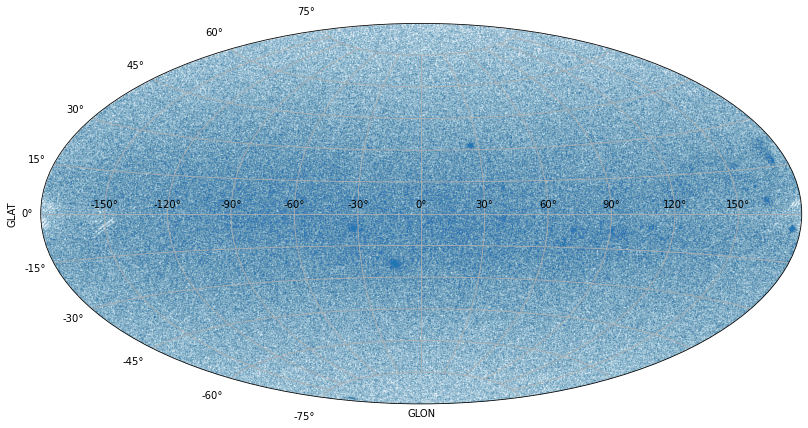

In [12]:
# see the distribution, if nothing is wrong, we can proceed
plt.figure(figsize=(14,7))
plt.subplot(111, projection='aitoff')
gaia_filt.viz.scatter("GLON", "GLAT", length_check=False, s=0.1, alpha=0.1)
plt.grid(True)
plt.show()

In [33]:
gaia["GLAT"]

Expression = GLAT
Length: 29,127,331 dtype: float64 (column)
------------------------------------------
       0  -27.8658
       1  -27.6348
       2  -27.8247
       3  -27.7871
       4  -28.4695
       ...        
29127326   26.0103
29127327   25.5593
29127328   25.3318
29127329   26.1396
29127330   25.4663

Convert into healpix

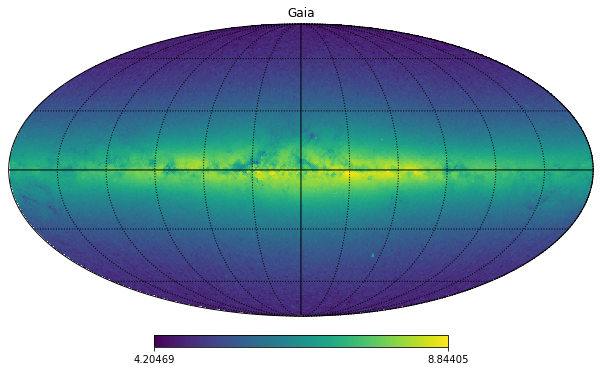

In [56]:
# from glon and glat, convert into healpix index
import healpy as hp

N = 6
nside = 2**N
index = hp.ang2pix(nside, gaia["GLON"].to_numpy(), gaia["GLAT"].to_numpy(), lonlat=True)
gaia["index"] = index

# group by index
gaia_group = gaia.groupby("index", agg="count").sort("index", ascending=True)

m = np.log(gaia_group['count'].to_numpy())
# # plot
hp.mollview(m, title="Gaia")
hp.graticule()


2mass

In [45]:
tmass_files = glob(join(data_tmass_dir, "*.hdf5"))
tmass_files.sort()
tmass_files[:5], len(tmass_files)

(['/home2/s20321005/Thesis-Project/Data/TMASS/tmass-000-001.hdf5',
  '/home2/s20321005/Thesis-Project/Data/TMASS/tmass-001-002.hdf5',
  '/home2/s20321005/Thesis-Project/Data/TMASS/tmass-002-003.hdf5',
  '/home2/s20321005/Thesis-Project/Data/TMASS/tmass-003-004.hdf5',
  '/home2/s20321005/Thesis-Project/Data/TMASS/tmass-004-005.hdf5'],
 360)

In [46]:
tmass = vaex.open_many(tmass_files)
tmass

#,ra,dec,Jmag,Kmag,designation,ph_qual
0,0.180498,-89.243835,13.123,12.679,00004331-8914378,AAA
1,0.338177,-89.481033,8.977,8.038,00012116-8928517,AAA
2,0.392894,-89.286575,12.769,12.33,00013429-8917116,AAA
3,0.491097,-89.325348,13.285,12.922,00015786-8919312,AAA
4,0.140988,-88.624542,12.574,12.226,00003383-8837283,AAA
...,...,...,...,...,...,...
"50,234,298",359.476859,88.387932,13.072,12.66,23575444+8823165,AAA
"50,234,299",359.704935,88.155998,12.469,11.92,23584918+8809215,AAA
"50,234,300",359.799848,88.985268,12.976,12.268,23591196+8859069,AAA
"50,234,301",359.909394,88.295273,13.087,12.508,23593825+8817429,AAA


In [52]:
# convert ra dec to galaxy coordinate using astropy
from astropy.coordinates import SkyCoord
from astropy import units as u

s = SkyCoord(ra=tmass["ra"].to_numpy()*u.degree, dec=tmass["dec"].to_numpy()*u.degree, frame='icrs')

tmass["GLON"] = s.galactic.l.value
tmass["GLAT"] = s.galactic.b.value
tmass

#,ra,dec,Jmag,Kmag,designation,ph_qual,GLON,GLAT
0,0.180498,-89.243835,13.123,12.679,00004331-8914378,AAA,303.11965887601536,-27.865853409339252
1,0.338177,-89.481033,8.977,8.038,00012116-8928517,AAA,303.05892508502853,-27.634818844001632
2,0.392894,-89.286575,12.769,12.33,00013429-8917116,AAA,303.1060625482833,-27.824748772457056
3,0.491097,-89.325348,13.285,12.922,00015786-8919312,AAA,303.0952655830097,-27.787151541057337
4,0.140988,-88.624542,12.574,12.226,00003383-8837283,AAA,303.2763741966109,-28.469540172350367
...,...,...,...,...,...,...,...,...
"50,234,298",359.476859,88.387932,13.072,12.66,23575444+8823165,AAA,122.5183839585538,25.55935523626105
"50,234,299",359.704935,88.155998,12.469,11.92,23584918+8809215,AAA,122.46770040344013,25.331878064327828
"50,234,300",359.799848,88.985268,12.976,12.268,23591196+8859069,AAA,122.67652076749864,26.139535612604043
"50,234,301",359.909394,88.295273,13.087,12.508,23593825+8817429,AAA,122.50883749261115,25.466252962471767


In [54]:
N = 6
nside = 2**N
index = hp.ang2pix(nside, tmass["GLON"].to_numpy(), tmass["GLAT"].to_numpy(), lonlat=True)
tmass["index"] = index

# group by index
tmass_group = tmass.groupby("index", agg="count").sort("index", ascending=True)

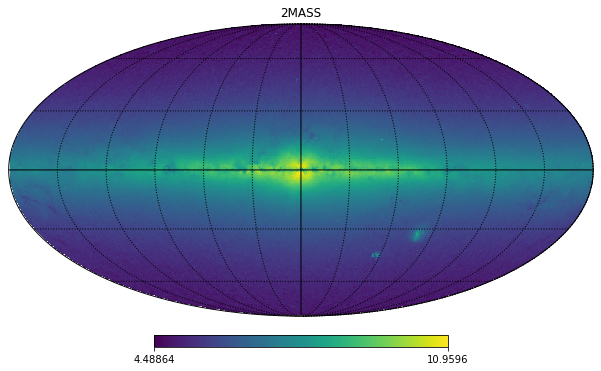

In [55]:
m = np.log(tmass_group['count'].to_numpy())
# # plot
hp.mollview(m, title="2MASS")
hp.graticule()